In [2]:
import cv2

In [3]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle

In [4]:
cam = cv2.VideoCapture(0)
cv2.namedWindow("webcam")

while True:
    ret, frame = cam.read()
    frame=cv2.flip(frame,1)
    if not ret:
        print("Failed to grab frame!")
        break

    cv2.imshow("webcam", frame)
    k = cv2.waitKey(1)

    if k % 256 == 27: #esc
        img_name = "newimage.jpg"
        cv2.imwrite(img_name, frame)
        print("Image taken!")
        break

cam.release()
cv2.destroyAllWindows()

Image taken!


In [5]:
pip install mtcnn

Note: you may need to restart the kernel to use updated packages.


In [6]:
from mtcnn_cv2 import MTCNN

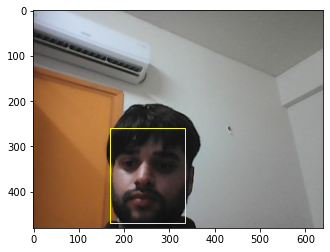

In [7]:
filename = 'newimage.jpg'
pixels = pyplot.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)

# draw_image_with_boxes11(filename, faces)
# data = pyplot.imread(filename)

pyplot.imshow(pixels)
ax = pyplot.gca()

for result in faces:
    x, y, width, height = result['box']
    rect = pyplot.Rectangle((x, y), width, height, fill=False, color='yellow')
    ax.add_patch(rect)


In [8]:
from matplotlib.patches import Circle
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='green')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=3, color='green')
			ax.add_patch(dot)

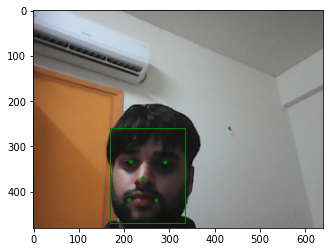

In [9]:
filename = 'newimage.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [10]:
from matplotlib.patches import Circle
def draw_image_with_boxes(filename, result_list):
#     pyplot.imshow(filename)
    for result in result_list:
        x, y, width, height = result['box']
        cv2.rectangle(filename,(x,y),(x+width,y+height),(0,255,0),2)
        for key, value in result['keypoints'].items():
            cv2.circle(img=filename,center=(value[0],value[1]),radius=3,color=(0,0,255),thickness=cv2.FILLED)
    cv2.imshow('window',filename)

In [11]:
from numpy import asarray
cam=cv2.VideoCapture(0)

while True:
    ret,filename = cam.read()
    # load image from file
    pixels=asarray(filename)
#     pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    faces = detector.detect_faces(pixels)
    # display faces on the original image
    draw_image_with_boxes(filename, faces)
    k = cv2.waitKey(1)
    if k % 256 == 27:
        break

In [36]:
pip install cmake

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install dlib-19.22.99-cp39-cp39-win_amd64.whl

Processing c:\users\asus\desktop\dlib-19.22.99-cp39-cp39-win_amd64.whl
dlib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install face_recognition

Note: you may need to restart the kernel to use updated packages.


In [33]:
import cv2
import face_recognition
import os
import numpy as np
from datetime import datetime
import pickle

In [34]:
path = "D:\\fac"

In [35]:
images = []
classNames = []
mylist = os.listdir(path)
for cl in mylist:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
print(classNames)

['Aditya-1', 'Amish', 'Aryan', 'Bill', 'Elif', 'Elon', 'Mark', 'Salman']


In [36]:
def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encoded_face = face_recognition.face_encodings(img)[0]
        encodeList.append(encoded_face)
    return encodeList
encoded_face_train = findEncodings(images)

In [ ]:
cap  = cv2.VideoCapture(0)
while True:
    success, img = cap.read()
    imgS = cv2.resize(img, (0,0), None, 0.25,0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)
    faces_in_frame = face_recognition.face_locations(imgS)
    encoded_faces = face_recognition.face_encodings(imgS, faces_in_frame)
    for encode_face, faceloc in zip(encoded_faces,faces_in_frame):
        matches = face_recognition.compare_faces(encoded_face_train, encode_face)
        faceDist = face_recognition.face_distance(encoded_face_train, encode_face)
        matchIndex = np.argmin(faceDist)
        print(matchIndex)
        if matches[matchIndex]:
        
            name = classNames[matchIndex].upper().lower()
            y1,x2,y2,x1 = faceloc
            # since we scaled down by 4 times
            y1, x2,y2,x1 = y1*4,x2*4,y2*4,x1*4
            cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
            cv2.rectangle(img, (x1,y2-35),(x2,y2), (0,255,0), cv2.FILLED)
            cv2.putText(img,name, (x1+6,y2-5), cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
            
    cv2.imshow('webcam', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

2
hi
2
hi
2
hi
2
hi
2
hi
0
hi
2
hi
2
hi
2
hi
2
hi
2
hi
2
hi
2
hi
2
hi
2
hi
2
hi
2
hi
2
hi
0
0
0
0
0
0
0
0
0
2
hi
2
hi
2
hi
2
hi
2
hi
2
hi
2
hi
2
hi
2
hi


In [1]:
path = 'Aryan.jfif'
img = cv2.imread(path)

imgS = cv2.resize(img, (0,0), None, 0.25,0.25)
imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)
faces_in_frame = face_recognition.face_locations(imgS)
encoded_faces = face_recognition.face_encodings(imgS, faces_in_frame)
for encode_face, faceloc in zip(encoded_faces,faces_in_frame):
    matches = face_recognition.compare_faces(encoded_face_train, encode_face)
    faceDist = face_recognition.face_distance(encoded_face_train, encode_face)
    matchIndex = np.argmin(faceDist)
    print(matchIndex)
#     print(classNames[matchIndex])
    name = classNames[matchIndex].upper().lower()
    x,y,w,h = faceloc
    print(x,y,w,h)
#     x,y,w,h = x*4,y*4,w*4,h*4
#     cv2.rectangle(imgS,(x,y),(x,y),(0,255,0),2)
    cv2.rectangle(imgS, (x,y-35),((x+150),(y)), (0,255,0), cv2.FILLED)
    cv2.putText(imgS,name, (x+6,y-5), cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)

cv2.imshow('webcam', imgS)
cv2.waitKey(0)


NameError: name 'cv2' is not defined